In [118]:
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [119]:
n_task_per_file =50
n_files = 10
base_dir = "vary_p_test_"
files_list = []
for i in range(n_files):
    dir = base_dir + str(i*n_task_per_file) + "_"  + str((i+1)*n_task_per_file) + ".pkl"
    files_list.append(dir)

In [120]:
oper_char_df = pd.DataFrame()

for f_dir in files_list:
    oper_char_i = joblib.load(f_dir)
    oper_char_df = pd.concat([oper_char_df, pd.DataFrame(oper_char_i)])

In [121]:
oper_char_df

,Coverage Rate,Length,MSE,Method,p
0,1.000000,6.696672,31.427251,RRT,5
1,0.666667,97.292421,32.484935,Tree-Values,5
2,1.000000,11.438072,30.847000,UV(0.1),5
3,0.833333,8.220488,35.264500,RRT,10
4,0.875000,56.015805,35.180564,Tree-Values,10
...,...,...,...,...,...
295,1.000000,11.595797,31.717710,Tree-Values,5
296,0.800000,9.594961,34.199496,UV(0.1),5
297,0.500000,6.871339,33.142864,RRT,10
298,1.000000,15.232064,35.758366,Tree-Values,10


In [122]:
oper_char_df.index = range(oper_char_df.shape[0])

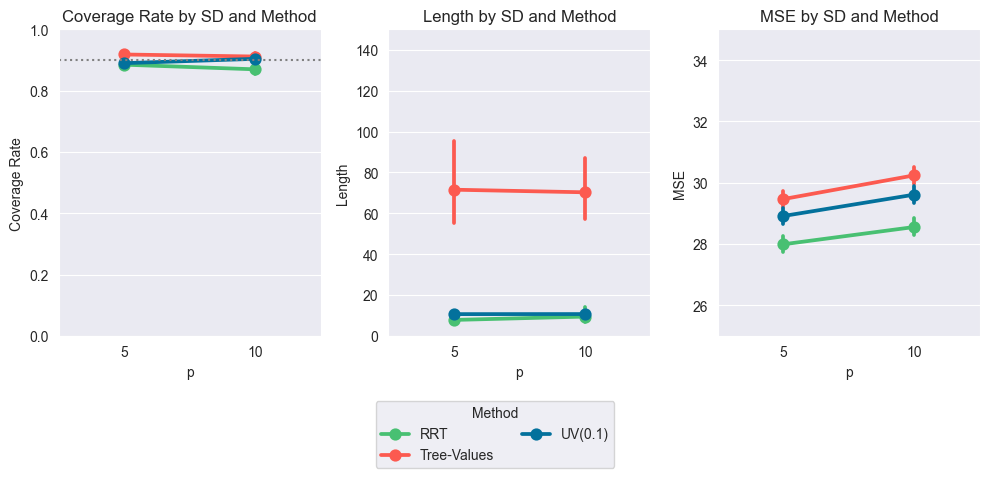

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named df
metrics = ["Coverage Rate", "Length", "MSE"]

# Set up the figure and axes for subplots
fig, axes = plt.subplots(1, 3, figsize=(10, 4), sharey=False)

my_palette = {"RRT": "#48c072",
              "Tree-Values": "#fc5a50",
              "UV(0.1)": "#03719c"}

# Iterate over each metric and create a box plot
for i, metric in enumerate(metrics):
    sns.pointplot(x='p', y=metric, hue='Method', data=oper_char_df, ax=axes[i],
                palette=my_palette)
    axes[i].set_title(f'{metric} by SD and Method')
    axes[i].set_xlabel('p')
    #axes[i].set_ylabel(metric if i == 0 else '')  # Only set ylabel on the first plot for clarity
    axes[i].legend(title='Method', loc='upper right')
    if metric == "Coverage Rate":
        axes[i].set_ylim(0.,1)
        axes[i].axhline(y=0.9, linestyle='dotted', color='grey')
    elif metric == "Length":
        axes[i].set_ylim(0,150)
    elif metric == "MSE":
        axes[i].set_ylim(25,35)

# Remove legends from individual subplots
for ax in axes:
    ax.legend_.remove()

# Create a shared legend for the figure
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, title="Method", loc="upper center", bbox_to_anchor=(0.5, 0), ncol=2)

# Adjust layout and display
plt.tight_layout()
plt.show()



In [124]:
means = oper_char_df.groupby(['Method', "p"])[["Coverage Rate", "Length", "MSE"]].mean().reset_index()
means

,Method,p,Coverage Rate,Length,MSE
0,RRT,5,0.885024,7.754305,27.987445
1,RRT,10,0.869857,9.393126,28.552139
2,Tree-Values,5,0.918333,inf,29.463524
3,Tree-Values,10,0.911690,70.264993,30.239196
4,UV(0.1),5,0.889990,10.604453,28.910672
5,UV(0.1),10,0.904152,10.632038,29.609253


In [99]:
tree_flag = (oper_char_df['Method'] == "Tree-Values")

In [100]:
oper_char_df[tree_flag].groupby(['p'])['Length'].apply(lambda x: np.isinf(x).mean()).reset_index(name='proportion_infinity')

,p,proportion_infinity
0,5,0.0
1,10,0.0
